# 장범준의 특징벡터와 박효신의 특징벡터 비교
보컬 추출 후 MFCCs를 통해 만들어진 특징 벡터를 시각화를 통한 비교

## PCA
PCA 거쳐 2차원 축소 후 시각화

         pc1       pc2 singer
0  0.0781267   2.05797    장범준
1    5.71569 -0.406928    장범준
2    1.12882  0.226642    장범준
3   -2.75861  -3.18882    박효신
4   -2.83148    3.4293    박효신
5   -1.33254  -2.11816    박효신
0    2.30754  0.625896  mean1
1   -2.30754 -0.625896  mean2


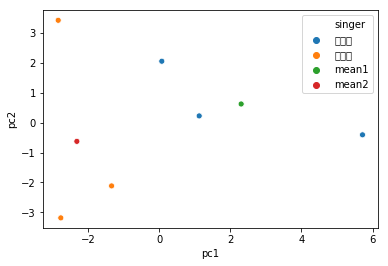

In [48]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

x = pd.read_csv('C:/Users/wnduq/Desktop/data.csv',encoding='euc-kr')
name_list=x['Unnamed: 0']
del x['Unnamed: 0']

#표준화
X = StandardScaler().fit_transform(x)
#PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pc = pca.fit_transform(X)
new = np.c_[pc,name_list]
df  = pd.DataFrame(new,columns=['pc1','pc2','singer'])
m1_x = np.mean(df[:3]['pc1'])
m1_y = np.mean(df[:3]['pc2'])
m2_x = np.mean(df[3:]['pc1'])
m2_y = np.mean(df[3:]['pc2'])

df2 = pd.DataFrame({'pc1': [m1_x,m2_x],
             'pc2': [m1_y,m2_y],
             'singer' : ['mean1','mean2']})
df = pd.concat([df,df2],axis = 0)
print(df)


# plot
축소된 2차원 데이터를 시각화

In [ ]:
#polting
import seaborn as sns
sns.scatterplot(x=df['pc1'],y=df['pc2'],hue=df['singer'])
